# Other Clustering Algorithms

In [10]:
from sklearn.datasets import load_iris, make_circles
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
import  numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

iris = load_iris()

## Spectral Clustering

Spectral clustering uses the distance matrix to define the Laplacian Matrix and transform the dataset by eigendecomposition. The implementation of scikit-learn uses K-means for obtaining the clusters n the transformed dataset (also a 'discretization' method can be applied).

CPU times: user 25 µs, sys: 22 µs, total: 47 µs
Wall time: 15.3 µs
AMI= 0.757363267828


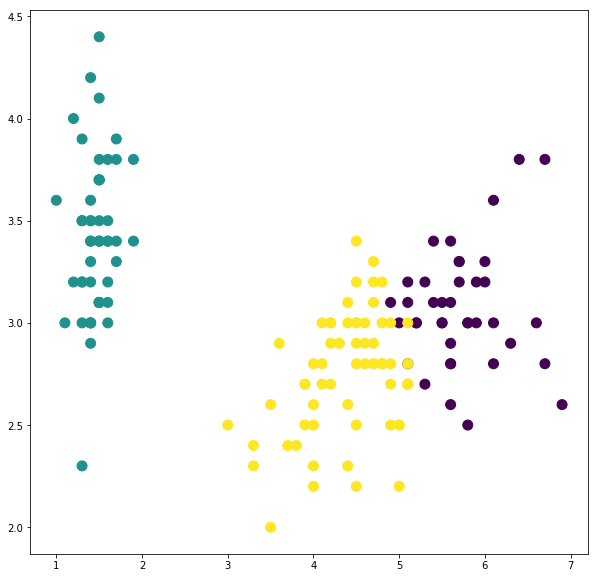

In [11]:
spec = SpectralClustering(n_clusters=3)
%time {spec.fit(iris['data'])}
labels = spec.fit_predict(iris['data'])
print("AMI=", adjusted_mutual_info_score(iris['target'], labels));
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

By default a RBF kernel is used to define the similarity matrix, but other possibilities like using the distances for only a number of neighbors or applying other kernel functions are possible. This makes this method related to Kernel K-means.

In [12]:
@interact(nn=(10,40, 5))
def g(nn=30):
    spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=nn)
    %time {spec.fit(iris['data'])}

    labels = spec.fit_predict(iris['data'])
    print(adjusted_mutual_info_score(iris['target'], labels))
    plt.figure(figsize=(10,10))
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

interactive(children=(IntSlider(value=30, description='nn', max=40, min=10, step=5), Output()), _dom_classes=('widget-interact',))

Depending on the transformation and parameters, the method is able to find non linearly separable clusters, but it is not always the case. You can see what happens with higher number of neighbors.

In [6]:
circles, clabels = datasets.make_circles(n_samples=200, factor=.5, noise=.05)
@interact(nn=(10,40, 5))
def g(nn=10):
    spec = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", n_neighbors=10)
    labels = spec.fit_predict(circles)
    print("AMI=", adjusted_mutual_info_score(clabels, labels)) 
    plt.figure(figsize=(10,10))
    plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=100)


interactive(children=(IntSlider(value=10, description='nn', max=40, min=10, step=5), Output()), _dom_classes=('widget-interact',))

## Affinity Propagation

Affinity propagation is related to probabilistical graphical models and is controled only by a parameter, the *damping factor* that controls how many clusters appear (the lower (0.5) the more clusters) buy the exact number of clusters obtained is determined by the algorithm. This example uses damping factor 0.5.

CPU times: user 0 ns, sys: 79 µs, total: 79 µs
Wall time: 28.8 µs
Clusters= 7
AMI= 0.516951447069


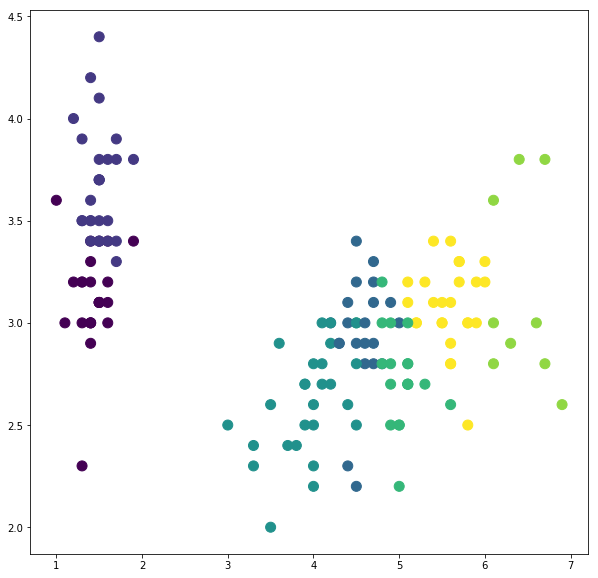

In [13]:
aff= AffinityPropagation(damping=0.5)
%time {aff.fit(iris['data'])}

labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);

And now with damping factor 0.98 (a value of 1 does not returns clusters)

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 11 µs
Clusters= 4
AMI= 0.675319358195


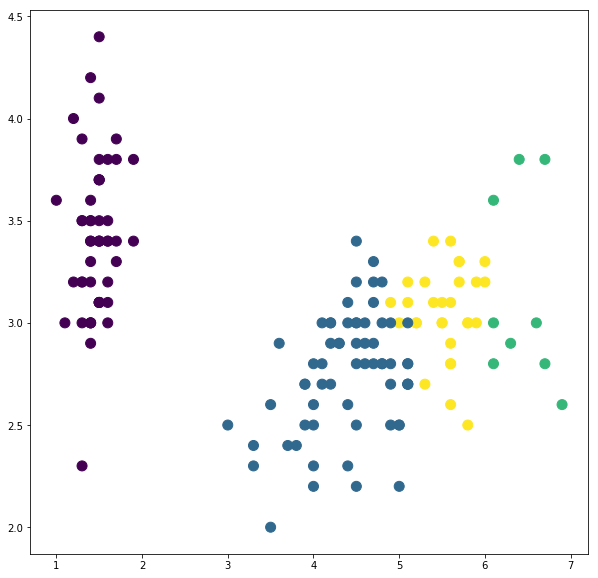

In [14]:
aff= AffinityPropagation(damping=0.98)
%time {aff.fit(iris['data'])}
labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))
print("AMI=",adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);